<a href="https://colab.research.google.com/github/mohitsshetty986/Movie-Recommendation-Systems/blob/master/Collaborative_Filtering_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Collaborative Filtering using KNN**

K nearest Neighbor K-nearest neighbor finds the k most similar items to a particular instance based on a given distance metric like euclidean, jaccard similarity , minkowsky or custom distance measures.

###**What is Collaborative filtering recommendation system?**

There are two persons, both of them own Iphones of same version. Suppose one person buys an iphone cover or earpods, then the other person will also be recommended to buy these items.

In [146]:
import pandas as pd
import matplotlib.pyplot as plot

####Importing required dataset files : movies.csv and ratings.csv

In [4]:
from google.colab import files
uploaded=files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


In [147]:
movies_metadata=pd.read_csv('movies.csv')
movies_metadata.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [148]:
ratings_metadata=pd.read_csv('ratings.csv')
ratings_metadata.head()

,userId,movieId,rating,timestamp
0,0,50,5.0,881250949
1,0,172,5.0,881250949
2,0,133,1.0,881250949
3,196,242,3.0,881250949
4,186,302,3.0,891717742


###**Let's merge both the dataframes to make our working easier and calculate few things that will help in future steps.**

We calculated the number of ratings for each movie in the following steps and merged everything into a dataframe. 

In [149]:
movies_ratings_combined=pd.merge(ratings_metadata,movies_metadata,on='movieId')
movies_ratings_combined

,userId,movieId,rating,timestamp,title,genres
0,0,50,5.0,881250949,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
1,290,50,5.0,880473582,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
2,79,50,4.0,891271545,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
3,2,50,5.0,888552084,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
4,8,50,5.0,879362124,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
1047249,10472,184393,5.0,1518426759,The Criminal Excellency Fund (2018),Action|Comedy|Crime
1047250,10494,124544,5.0,1461152006,Perfume (2001),Comedy|Drama
1047251,10518,66025,1.0,1233955153,Go Go Tales (2007),Comedy|Drama
1047252,10518,99906,3.0,1358520547,Renoir (2012),Drama|Romance


In [150]:
no_of_ratings=movies_ratings_combined.groupby('title')['rating'].count().reset_index().rename(columns={'rating': 'Number of Ratings'})

no_of_ratings.head()

,title,Number of Ratings
0,"""Great Performances"" Cats (1998)",8
1,#Horror (2015),1
2,#realityhigh (2017),1
3,$ (Dollars) (1971),1
4,$5 a Day (2008),2


In [151]:
ratings_noofRatings_combined=movies_ratings_combined.merge(no_of_ratings, left_on = 'title', right_on = 'title', how = 'left')
ratings_noofRatings_combined.head()

,userId,movieId,rating,timestamp,title,genres,Number of Ratings
0,0,50,5.0,881250949,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682
1,290,50,5.0,880473582,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682
2,79,50,4.0,891271545,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682
3,2,50,5.0,888552084,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682
4,8,50,5.0,879362124,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682


###Let's see some interesting information on the dataset we have. We can check the histogram for number of ratings data. 

In [152]:
no_of_ratings['Number of Ratings'].describe()

count    21773.000000
mean        48.098746
std        160.347742
min          1.000000
25%          1.000000
50%          4.000000
75%         21.000000
max       3530.000000
Name: Number of Ratings, dtype: float64

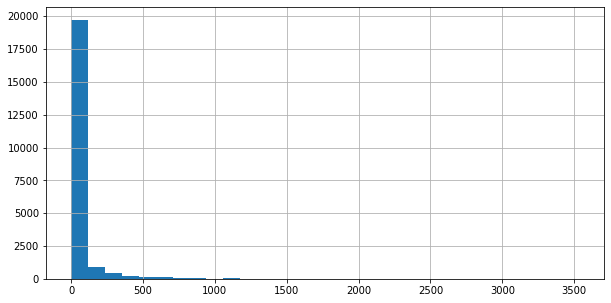

In [153]:
plot.figure(figsize=(10,5))
no_of_ratings['Number of Ratings'].hist(bins=30);

**Let's filter out movies that have lesser votes because more importantly popular movies should be recommended to the users.**

###A movie with 20 votes and 4/5 average ratings must be preferred over a movie with 2 votes and 5/5 average ratings. 

In [154]:
filtering_movies_thresholdno_ratings=ratings_noofRatings_combined[ratings_noofRatings_combined['Number of Ratings']>100]
filtering_movies_thresholdno_ratings.head()

,userId,movieId,rating,timestamp,title,genres,Number of Ratings
0,0,50,5.0,881250949,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682
1,290,50,5.0,880473582,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682
2,79,50,4.0,891271545,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682
3,2,50,5.0,888552084,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682
4,8,50,5.0,879362124,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2682


In [155]:
filtered_movies=pd.DataFrame(filtering_movies_thresholdno_ratings[['movieId','title']].drop_duplicates(subset=None, keep='first', inplace=False).set_index('title'))
filtered_movies

,movieId
title,
"Usual Suspects, The (1995)",50
Johnny Mnemonic (1995),172
Nueba Yol (1995),133
Farinelli: il castrato (1994),242
"Queen Margot (Reine Margot, La) (1994)",302
...,...
Megamind (2010),81564
"Secret Life of Walter Mitty, The (2013)",106918
Ponyo (Gake no ue no Ponyo) (2008),65261


From above step we see a total of 2283 movies will be compared for recommendation. 

---



###**Now we create a Pivot matrix which is a key component to make movie recommendations.**

###User ids on X-axis and movie titles on Y-axis. The cell values will be ratings of the movies(rows) given by different users(columns) and there are many movies people have not rated/seen which are NaN values, so we will convert them to 0's.

Want to know more about Pivot Table check the [link](https://pbpython.com/pandas-pivot-table-explained.html)

In [156]:
movies_ratings_pivot=filtering_movies_thresholdno_ratings.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movies_ratings_pivot.head()

userId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10492,10493,10494,10495,10496,10497,10498,10499,10500,10501,10502,10503,10504,10505,10506,10507,10508,10509,10510,10511,10512,10513,10514,10516,10517,10518,10519,10520,10521,10522,10523,10524,10525,10526,10527,10528,10529,10530,10531,10532
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###We will add an index column named 'indexing' (please check the last column in the dataframe displayed below) which will be used later on.

In [157]:
movies_ratings_pivot['indexing']=list(range(len(movies_ratings_pivot.index)))
movies_ratings_pivot.head(3)

userId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10493,10494,10495,10496,10497,10498,10499,10500,10501,10502,10503,10504,10505,10506,10507,10508,10509,10510,10511,10512,10513,10514,10516,10517,10518,10519,10520,10521,10522,10523,10524,10525,10526,10527,10528,10529,10530,10531,10532,indexing
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


**A matrix is sparse if many of its coefficients are zero. The interest in sparsity arises because its exploitation can lead to enormous computational savings and because many large matrix problems that occur in practice are sparse.**

In [158]:
from scipy.sparse import csr_matrix

movies_ratings_matrix=csr_matrix(movies_ratings_pivot.values)  #the matrix is converted to an array

##**We will be using KNN in next step.**

**We know that KNN works on Euclidean distance. We will also use Cosine similarities here.**

For KNN please check the [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

To understand KNN with an example please check the [link](https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html)



---


For Cosine similarity please check the [link](https://www.machinelearningplus.com/nlp/cosine-similarity/#2whatiscosinesimilarityandwhyisitadvantageous)

Cosine Similarityformula

![Cosine Similarity](https://neo4j.com/docs/graph-algorithms/current/images/cosine-similarity.png)


In [159]:
from sklearn.neighbors import NearestNeighbors

KNN_Model=NearestNeighbors(metric='cosine',algorithm='brute')
KNN_Model.fit(movies_ratings_matrix)         #model created

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

From above output p=2 means Power parameter for the Minkowski metric.

---



Our choice of movie is "Forrest Gump". Let's check what will be recommended to us based on our choice and other user's preferences.


---



**'indexing'** column is used to get that entire row of pivot table where movie title equals 'Forrest Gump'.


---


**reshape(1,-1)** is used when you don't know clearly the dimension of that axis.

E.g,
If I have an array of shape (2,4) and I'm reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 8 rows, hence, (8,1).


---


**n-neighbors=11** means: '1' Forrest Gump + '10' movies recommended to us. 

In [172]:
movie_index=movies_ratings_pivot.reset_index().query('title == "Forrest Gump (1994)"')['indexing']

distances, indices = KNN_Model.kneighbors(movies_ratings_pivot.iloc[movie_index,:].values.reshape(1, -1), n_neighbors = 11)

###**Finally we get the movie recommendations based on 'Forrest Gump'**

The flatten() function is used to get a copy of a given array collapsed into one dimension.

In [180]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Here are the movie recommendations based on your movie choice {0}:\n'.format(movies_ratings_pivot.index[movie_index]))
    else:
        print('{0}: {1}, with similarity distance of {2}'.format(i, movies_ratings_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Here are the movie recommendations based on your movie choice Index(['Forrest Gump (1994)'], dtype='object', name='title'):

1: Jurassic Park (1993), with similarity distance of 0.02929399931583221
2: Pulp Fiction (1994), with similarity distance of 0.03155639387484743
3: Shawshank Redemption, The (1994), with similarity distance of 0.031933642678087515
4: Silence of the Lambs, The (1991), with similarity distance of 0.032411297854117116
5: Lion King, The (1994), with similarity distance of 0.03427241856072405
6: Matrix, The (1999), with similarity distance of 0.03434047172652399
7: Fugitive, The (1993), with similarity distance of 0.0348059880127084
8: Schindler's List (1993), with similarity distance of 0.03525308685162676
9: Terminator 2: Judgment Day (1991), with similarity distance of 0.036114549685743125
10: Seven (a.k.a. Se7en) (1995), with similarity distance of 0.03620210402537949
